In [1]:
import keras # 패키지가 잘 작동됐는지 확인하는 용도로도 쓰임
print(keras.__version__)

2.9.0


In [2]:
from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000) # 케라스에서 제공하는 옵션으로, 상위 10000개 단어만 가져오는 옵션을 준다.

In [3]:
train_data.shape

(25000,)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0] # 1이 나왔으면 긍정값, 0이 나왔으면 부정값.

1

In [6]:
word_index = imdb.get_word_index() # 단어와 정수를 매핑한 딕셔너리를 리턴
word_index.items() # 안에 있는 항목들에 대한 리스트를 가져옴.
reverse_word_index = dict([value, key] for (key, value) in word_index.items()) # 파이썬 문법으로 함축적으로 쓴거라 한눈에 들어오지 않으니 지양한다고 하심.

In [7]:
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]]) #i-3하는 이유는 데이터에서 0,1,2는 중요하지 않은 패디값, 기호로 되어 있기때문에(i-3가 음수가되면 키에 없는 값이 되므로 '?'로 치환시키기 위함.)
decoded_review
# get() 은 key값을 통해 value 를 찾아주고 못찾은 경우에는 '?' 로 대체. 이 작업이 필요한 이유는 위에서 데이터를 받아올 때 num_words=10000 을 통해 만 개의 자주 쓰이는 단어만 가져왔으므로 나머지 단어에 대해서는 값이 존재하지 않으므로 다음 작업이 필요. 그리고 각 단어를 join() 을 통해서 공백으로 이어줌.

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
type(reverse_word_index)

dict

In [9]:
# 데이터를 준비
import numpy as np
import matplotlib.pyplot as plt

#10000 크기의 모든 성분이 0인 2차원 넘파이 배열을 만들어줌.
def vectorize_sequences(sequences, dimension=10000): # 공식처럼 사용되는 함수. 디폴트값을 10000으로 설정해서 함수호출 시 값을 안주면 디폴트로 10000값이 들어감.
  results = np.zeros((len(sequences), dimension)) # Sequences는 250000개이므로 (25000, 10000) 2차원 배열이 만들어짐.
  
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1

  return results

# Data의 Encoding
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [11]:
# float type으로 변환
# 텐서라는건 벡터의 머신러닝판

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
# 신경망의 구축
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', #이진분류의 손실함수는 얘로 정해져있음. 손실함수 몇 개 안되니 공식처럼 외우라고 하심.
              metrics=['accuracy']) 

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# 여기서 중요하게 봐야되는건 검증 정확도랑 검증 로스값.

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5533 - accuracy: 0.7751 - val_loss: 0.4266 - val_accuracy: 0.8553
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3405 - accuracy: 0.8969 - val_loss: 0.3392 - val_accuracy: 0.8753
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2481 - accuracy: 0.9209 - val_loss: 0.2858 - val_accuracy: 0.8927
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1940 - accuracy: 0.9377 - val_loss: 0.2750 - val_accuracy: 0.8932
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1587 - accuracy: 0.9496 - val_loss: 0.2788 - val_accuracy: 0.8885
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1306 - accuracy: 0.9601 - val_loss: 0.2853 - val_accuracy: 0.8888
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1095 - accuracy: 0.9675 - val_loss: 0.3256 - val_accuracy: 0.8797
Epoch 8/20
30

In [18]:
# 실험 결과 데이터를 가져온다.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

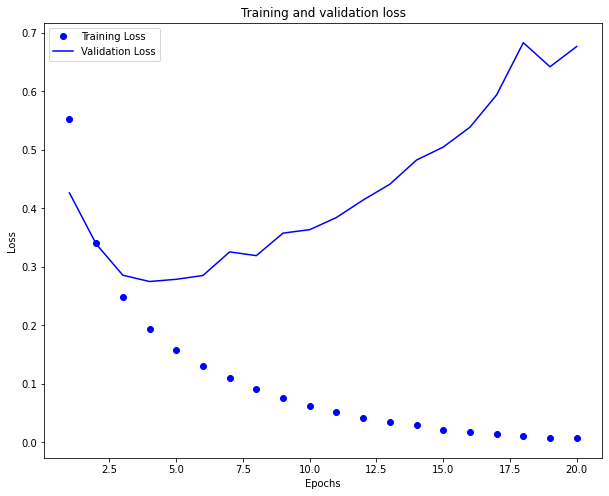

In [23]:
# 실험 결과를 시각화 한다.
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.plot(epochs,  loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 학습 데이터 정확도가 올라가는건 그 데이터에 대해서만 올라가는 것.

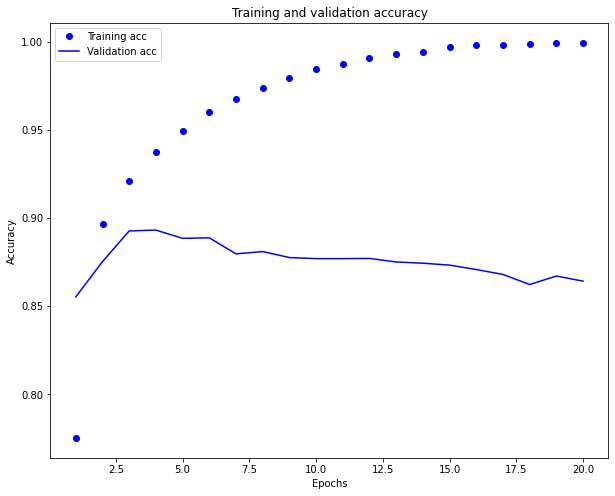

In [26]:
plt.figure(figsize=(10,8))
plt.plot(epochs, acc, 'bo', label= 'Training acc')
plt.plot(epochs, val_acc, 'b-', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [35]:
# 모델을 다시 초기화 해준다.(위에 써준거 다시 실행해줌.)
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [36]:
#오버피팅 방지를 위해서(테스트 데이터에 너무 맞춰지는걸 방지)
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy']) 

In [37]:
##################################

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=3,
                    batch_size=512, #2의 배수로 잡는 이유는 컴퓨터가 2의 배수로 이루어져 있어서.
                    validation_data=(x_val, y_val))

Epoch 1/3
30/30 [==============================] - 3s 60ms/step - loss: 0.5051 - accuracy: 0.7805 - val_loss: 0.3780 - val_accuracy: 0.8693
Epoch 2/3
30/30 [==============================] - 1s 40ms/step - loss: 0.3006 - accuracy: 0.9024 - val_loss: 0.3020 - val_accuracy: 0.8889
Epoch 3/3
30/30 [==============================] - 1s 39ms/step - loss: 0.2188 - accuracy: 0.9293 - val_loss: 0.2898 - val_accuracy: 0.8841
